In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML
# import line_profiler as lp 

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import sys
sys.path.append('../src')
# from model import *
from model2D import *
from datagen2D_v2 import *
from analysis import *
from datagen2D import *

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU: ", device)
else:
    device = torch.device("cpu")
    print("Running on CPU")

torch.set_default_device(device)
# torch.cuda.synchronize()
torch._dynamo.config.suppress_errors = True
torch.set_float32_matmul_precision("high")

/home/mattis/anaconda3/envs/torch2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on GPU:  cuda:0
Running on GPU:  cuda:0
Running on GPU:  cuda:0
Running on GPU:  cuda:0


/home/mattis/anaconda3/envs/torch2/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mattis/anaconda3/envs/torch2/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mattis/anaconda3/envs/torch2/lib/python3.10/site-packages/umap/d

Running on GPU:  cuda:0


In [2]:
dg = datagen2D_OU()
# data,labels = dg(n_data=100,t_steps=200)

(100, 200, 2)


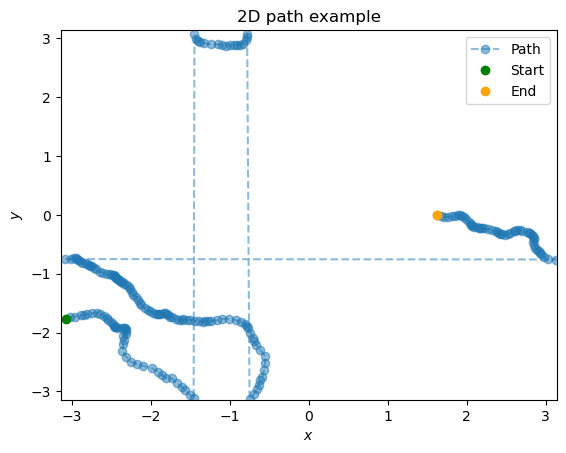

In [3]:
path = labels.cpu().detach().numpy()

# path = np.array(labels)

# Unsqeeze to add a batch dimension
# path = np.expand_dims(path, axis=0)
print(path.shape)

n = 0
p0 = data[n,0,:].cpu().detach().numpy()
plt.plot(path[n,:,0], path[n,:,1], '--o',alpha=0.5)
# # Plot first
# plt.plot(path[n,0,0],path[n,0,1],"o",color="green")
plt.plot(p0[0],p0[1],"o",color="green")
# # Plot last
plt.plot(path[n,-1,0],path[n,-1,1],"o",color="orange")
plt.title("2D path example")
plt.xlim(-np.pi,np.pi)
plt.ylim(-np.pi,np.pi)
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["Path","Start","End"])
plt.show()

In [3]:
gen = dg.dataset_constant(1000,batch_size=256,time_steps=40)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [03:38<00:00,  4.58it/s]
/home/mattis/anaconda3/envs/torch2/lib/python3.10/site-packages/numpy/lib/npyio.py:528: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  arr = np.asanyarray(arr)
/home/mattis/anaconda3/envs/torch2/lib/python3.10/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr

Last training time steps: 40


In [ ]:
# class Datamodel(Dataset):
#     def __init__(self,time_pos_points,labels):
#         self.x = time_pos_points
#         self.y = labels
#     def __len__(self): 
#         return self.x.shape[0]
#     def __getitem__(self, ix):
#         return self.x[ix], self.y[ix]

# data = input_data[:,0]
# labels = input_data[:,1]
# datamodel = Datamodel(data, labels)
# data_loader = DataLoader(datamodel, batch_size=1, shuffle=False, num_workers=1)